# Семинар 3: линейная регрессия, обучение и валидация модели.

### Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую обучение одномерной линейной регрессии методом градиентного спуска.

In [1]:
def linear_regression(X, y_true, m=0, b=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y_true))
    for i in range(epochs):
        y_pred = m * X + b
        cost = sum([err**2 for err in (y_pred-y_true)])*(1./N)
        
        m_gradient = (2./N)*sum(X*(y_pred-y_true))
        b_gradient = (2./N)*sum(y_pred-y_true)
        
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient
            
    return m, b, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


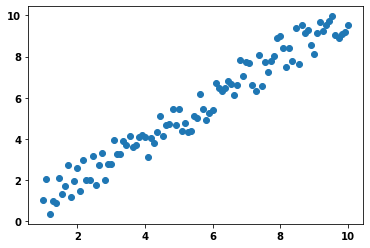

In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

### Обучим нашу линейную регрессию и посмотрим на результат

MSE: 0.3147256167342485


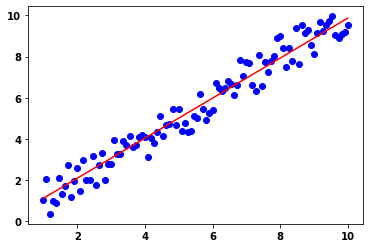

In [3]:
m, b, cost = linear_regression(x,y) # обучение

y_pred = m * x + b # предсказание

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

lr =  0.1
ep =  10


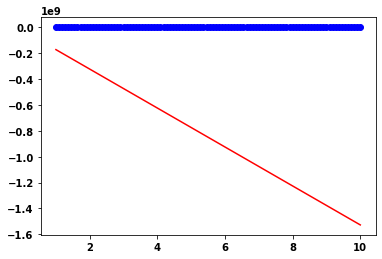

MSE: 2.0225422979011064e+16
lr =  0.1
ep =  100


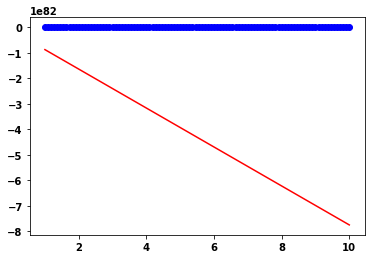

MSE: 5.21151178856088e+163
lr =  0.1
ep =  1000


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
c:\programdata\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


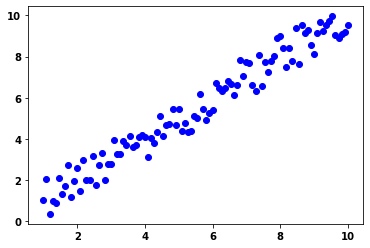

MSE: nan
lr =  0.01
ep =  10


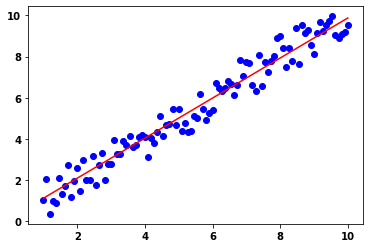

MSE: 0.3147280682679219
lr =  0.01
ep =  100


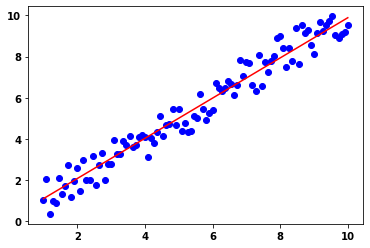

MSE: 0.3139492291716434
lr =  0.01
ep =  1000


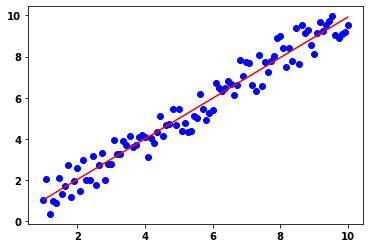

MSE: 0.31310745327361234
lr =  0.0001
ep =  10


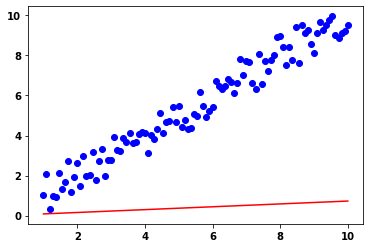

MSE: 32.32026242482974
lr =  0.0001
ep =  100


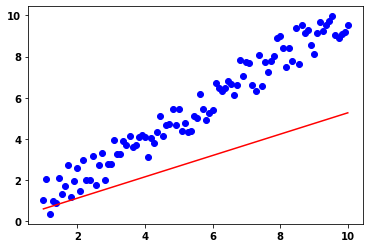

MSE: 8.434706792113655
lr =  0.0001
ep =  1000


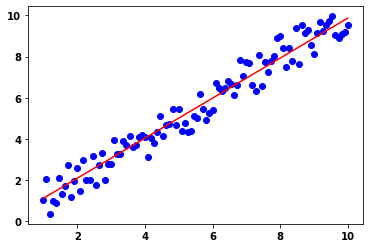

MSE: 0.3147256167342485


In [5]:
for lr in [0.1, 0.01, 0.0001]:
    for ep in [10, 100, 1000]:
        print('lr = ', lr)
        print('ep = ', ep)
        m, b, cost = linear_regression(x, y, learning_rate=lr, epochs=ep) # обучение

        y_pred = m * x + b # предсказание

        plt.scatter(x, y, color='blue')
        plt.plot(x, y_pred, 'r-')
        plt.show()

        print('MSE: {}'.format(cost))        

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

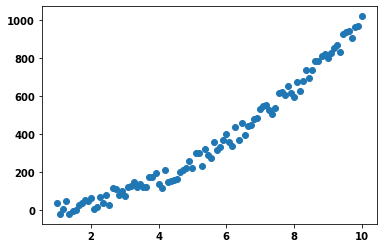

In [7]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.linspace(1, 10, num_points)
y = m * x**2 + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

MSE: 838.9613075973376


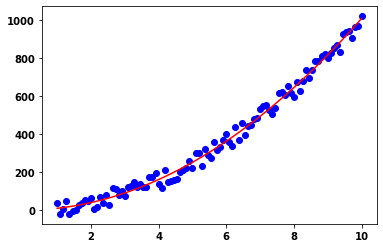

In [8]:
x2 = x ** 2

m, b, cost = linear_regression(x2,y) # обучение

y_pred = m * x2 + b # предсказание

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

In [10]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9906116852411143

# Задание 3

Считайте файл weights_heights.csv

In [11]:
df = pd.read_csv("weights_heights.csv")
df.head()

,Weight,Height
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Обучение и валидация модели.

Разобъем данные на тренировочную и валидационную часть и обучим линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2)

m, b, cost = linear_regression(X_train, y_train, learning_rate=0.00001)

Сделаем предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислим MSE на train и на test.

In [14]:
from sklearn.metrics import mean_squared_error

pred_train = m * X_train + b
pred_test = m * X_test + b

print("Train MSE: {}".format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("Test MSE: {}".format(np.sqrt(mean_squared_error(y_test, pred_test))))

Train MSE: 5.490130332310536
Test MSE: 5.589944477653335


# Теперь проверим, как работает функция линейной регрессии из sklearn

In [17]:
X_train.head()

18063    136.2363
8814     115.5257
16651    143.9000
5517     130.4536
22626    142.1744
Name: Height, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

X_train2, X_test2, y_train, y_test = train_test_split(df[['Height']], df['Weight'], test_size=0.2)

lr = LinearRegression()
lr.fit(X_train2,y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print("Train MSE: {}".format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("Test MSE: {}".format(np.sqrt(mean_squared_error(y_test, pred_test))))

Train MSE: 1.641125651017731
Test MSE: 1.6541185508758527


Посмотрим на качество линейной регрессии на кросс-валидации.

In [30]:
from sklearn.model_selection import cross_val_score

-cross_val_score(lr, df[['Height']], df['Weight'], cv=5, scoring='neg_mean_squared_error').mean()

2.7028607259823416

In [31]:
lr.fit(df[['Height']], df['Weight'])

LinearRegression()

# Задание 4

Поработаем с датасетом Бостон.

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

In [ ]:
X_full = data.data
y_full = data.target

y_full[:5]

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации с тремя фолдами, измеряйте ошибку MSE.

In [ ]:
#your code here

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [ ]:
#your code here

Нарисуем матрицу корреляций признаков.

In [ ]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

plt.figure(figsize=(10,10))
corr = data1.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here